In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from sklearn import linear_model
from IPython.display import Image
import json
from urllib.request import urlopen
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

In [105]:
##ignore this cell
df = pd.read_csv('Russell-3000-Stock-Tickers-List.csv')
stock_tickers = [ticker[1:] for ticker in df['Ticker'].to_list()]
historical_close = pd.DataFrame()
fundamentals = pd.DataFrame(columns = ['Ticker', 'Industry', 'Market Cap', 'PE Ratio TTM', 'Return on Equity TTM', 'Net Profit Margin TTM', 'Revenue Growth (1 Year)', 'EPS Growth (1 year)', 'EBIDTA', 'Cash', 'Total Debt'])
for stock in stock_tickers:
    print(stock)
    try:
        historical_close[stock] = yf.download(stock, '2018-1-1')['Adj Close']
    except:
        print('stock not available')
    try:
        profile_url = f"https://financialmodelingprep.com/api/v3/profile/{stock}?apikey=f10cedea6761d7a1e7b59259705362e1"
        ratio_url = f"https://financialmodelingprep.com/api/v3/ratios-ttm/{stock}?apikey=f10cedea6761d7a1e7b59259705362e1"
        financialGrowth_url = f"https://financialmodelingprep.com/api/v3/financial-growth/{stock}?limit=20&apikey=f10cedea6761d7a1e7b59259705362e1"
        incomeStatement_url = f"https://financialmodelingprep.com/api/v3/income-statement/{stock}?period=quarter&limit=400&apikey=f10cedea6761d7a1e7b59259705362e1"
        balanceSheet_url = f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?period=quarter&limit=400&apikey=f10cedea6761d7a1e7b59259705362e1"
        profile_dict = get_jsonparsed_data(profile_url)
        ratios_dict = get_jsonparsed_data(ratio_url)
        financialGrowth_dict = get_jsonparsed_data(financialGrowth_url)
        incomeStatement_dict = get_jsonparsed_data(incomeStatement_url)
        balanceSheet_dict = get_jsonparsed_data(balanceSheet_url)
        vals_dict = {}
        vals_dict['Ticker'] = stock
        vals_dict['Industry'] = profile_dict[0]['industry']
        vals_dict['Market Cap'] = profile_dict[0]['mktCap']
        vals_dict['PE Ratio TTM'] = ratios_dict[0]['peRatioTTM']
        vals_dict['Return on Equity TTM'] = ratios_dict[0]['returnOnEquityTTM']
        vals_dict['Net Profit Margin TTM'] = ratios_dict[0]['netProfitMarginTTM']
        vals_dict['Revenue Growth (1 Year)'] = financialGrowth_dict[0]['revenueGrowth']
        vals_dict['EPS Growth (1 year)'] = financialGrowth_dict[0]['epsgrowth']
        vals_dict['EBIDTA'] = incomeStatement_dict[0]['ebitda']
        vals_dict['Cash'] = balanceSheet_dict[0]['cashAndCashEquivalents']
        vals_dict['Total Debt'] = balanceSheet_dict[0]['totalDebt']
        fundamentals = fundamentals.append(vals_dict, ignore_index=True)
    except:
        print('fundamentals not available')
historical_close

*****************100%***********************]  1 of 1 completed
RHP
[*********************100%***********************]  1 of 1 completed
RICK
[*********************100%***********************]  1 of 1 completed
RIG
[*********************100%***********************]  1 of 1 completed
RIGL
[*********************100%***********************]  1 of 1 completed
RILY
[*********************100%***********************]  1 of 1 completed
RJF
[*********************100%***********************]  1 of 1 completed
RL
[*********************100%***********************]  1 of 1 completed
RLGT
[*********************100%***********************]  1 of 1 completed
RLGY
[*********************100%***********************]  1 of 1 completed
RLI
[*********************100%***********************]  1 of 1 completed
RLJ
[*********************100%***********************]  1 of 1 completed
RLMD
[*********************100%***********************]  1 of 1 completed
RM
[*********************100%***********************]  

,A,AA,AAL,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,...,SWK,SWKS,SWM,SWN,SWTX,SWX,SXC,SXI,SXT,SYBT
2018-01-02,65.985886,55.169998,51.647556,39.088535,37.910000,36.137646,104.916702,41.105534,35.326839,57.950001,...,159.183731,93.537956,39.358990,5.91,NaN,73.247162,11.288157,97.483749,69.024803,34.997738
2018-01-03,67.664825,54.500000,51.014027,39.286591,37.889999,36.773354,105.866096,41.098373,35.012089,58.299999,...,159.769470,94.963417,39.393196,5.91,NaN,72.668465,11.278859,98.014870,69.062073,34.536018
2018-01-04,67.157242,54.700001,51.335667,39.445061,38.380001,36.626656,109.772415,41.289268,34.364059,59.250000,...,160.392929,95.761665,39.247837,5.86,NaN,72.686821,11.241665,99.608215,69.024803,34.489845
2018-01-05,68.230972,54.090000,51.316177,39.553989,38.889999,37.213459,110.939346,41.759361,34.382572,56.549999,...,161.139206,96.198822,39.187981,5.59,NaN,72.420448,11.213771,98.980545,69.322960,34.905392
2018-01-08,68.377396,55.000000,50.809345,40.326450,38.369999,36.626656,110.158089,41.604263,34.456635,56.299999,...,163.104080,96.217812,39.718128,5.73,NaN,72.824608,11.278859,100.139328,68.614822,34.582195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,112.209999,19.809999,13.560000,64.599998,7.840000,65.812271,145.559998,113.849998,30.260000,54.040001,...,190.227951,138.029999,34.891571,3.12,67.430000,67.389999,4.740000,77.830002,71.980003,40.930000
2020-11-24,114.680000,20.820000,14.820000,66.330002,7.910000,66.610001,149.830002,115.169998,31.379999,56.360001,...,190.028702,138.850006,36.690002,3.35,65.570000,69.029999,4.830000,80.680000,74.040001,43.139999
2020-11-25,114.349998,20.370001,14.940000,64.440002,8.430000,65.870003,149.399994,116.029999,30.490000,56.009998,...,185.704880,135.949997,35.669998,3.26,67.000000,68.040001,4.750000,78.370003,72.949997,42.150002
2020-11-27,114.089996,20.480000,14.980000,64.669998,8.140000,65.919998,149.929993,116.589996,30.180000,56.330002,...,187.010010,136.160004,35.310001,3.25,68.000000,66.589996,4.810000,78.089996,72.599998,41.259998


In [5]:
final_values = pd.read_csv('out.csv').set_index('Ticker')
final_values

,Market Cap,PE Ratio TTM,Return on Equity TTM,Net Profit Margin TTM,Revenue Growth (1 Year),EPS Growth (1 year),EBIDTA,Cash,Total Debt,2018-01-02 00:00:00,...,2020-11-16 00:00:00,2020-11-17 00:00:00,2020-11-18 00:00:00,2020-11-19 00:00:00,2020-11-20 00:00:00,2020-11-23 00:00:00,2020-11-24 00:00:00,2020-11-25 00:00:00,2020-11-27 00:00:00,2020-11-30 00:00:00
Ticker,,,,,,,,,,,,,,,,,,,,,
A,0.267685,-0.017182,0.027162,0.048249,-0.043289,0.022973,-0.031499,-0.044767,-0.033242,65.985886,...,110.269997,109.860001,105.949997,108.680000,110.889999,112.209999,114.680000,114.349998,114.089996,116.900002
AA,-0.136486,-0.025212,0.023736,0.047132,-0.104967,0.012349,-0.034640,-0.036378,-0.032590,55.169998,...,17.660000,18.270000,18.330000,18.930000,18.820000,19.809999,20.820000,20.370001,20.480000,19.900000
AAL,-0.074354,-0.025386,0.039532,0.045876,-0.048527,0.020186,-0.212211,-0.069290,0.083626,51.647556,...,12.790000,12.700000,12.740000,12.790000,12.530000,13.560000,14.820000,14.940000,14.980000,14.130000
AAN,-0.129537,-0.028294,0.023864,0.047134,-0.047743,0.018821,-0.007567,-0.064470,-0.038406,39.088535,...,61.119999,60.889999,61.360001,62.700001,63.009998,64.599998,66.330002,64.440002,64.669998,62.930000
AAOI,-0.180708,-0.025212,0.021691,0.045309,-0.119641,-0.016750,-0.047009,-0.073866,-0.039746,37.910000,...,7.510000,7.480000,7.540000,7.770000,7.920000,7.840000,7.910000,8.430000,8.140000,8.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SWX,-0.137395,-0.022298,0.025445,0.047869,-0.035897,0.019959,-0.042613,-0.074373,-0.031854,73.247162,...,70.440002,69.820000,67.599998,67.419998,67.269997,67.389999,69.029999,68.040001,66.589996,64.250000
SXC,-0.178420,-0.018974,0.025678,0.047478,-0.031441,0.012372,-0.044604,-0.072996,-0.038063,11.288157,...,4.083928,4.222032,4.370000,4.310000,4.480000,4.740000,4.830000,4.750000,4.810000,4.500000
SXI,-0.171341,-0.020518,0.026222,0.047682,-0.108297,0.018994,-0.045820,-0.072825,-0.039623,97.483749,...,77.080002,76.699997,75.300003,75.120003,75.029999,77.830002,80.680000,78.370003,78.089996,75.459999


In [7]:
pca = PCA(n_components= 7)
final_X = pca.fit_transform(final_values.values)
print(pca.explained_variance_ratio_.sum())
print(final_X.shape)

0.9984922589890869
(2118, 7)


In [8]:
variance = []
for k in range(1, 75): # 159 is the number of sectors
    km = KMeans(n_clusters=k, 
                )
    km.fit(final_X)
    variance.append(km.inertia_)

Text(0.5, 1.0, 'Elbow')

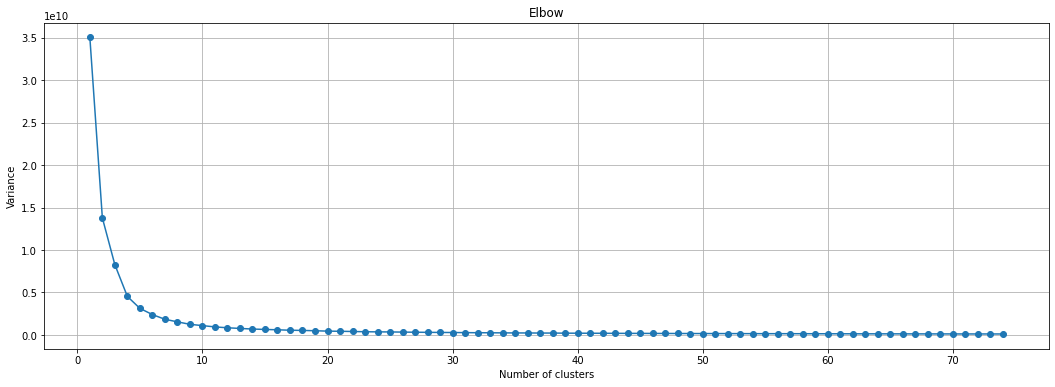

In [9]:
plt.figure(figsize = (18,6))
plt.plot(range(1, 75), variance, marker='o')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.title('Elbow')

In [10]:
km = KMeans(n_clusters=40,init= 'random', max_iter= 800,n_init= 300,algorithm= 'elkan', random_state= 5)
km.fit(final_X)
labels = km.labels_
clustered_series = pd.DataFrame({'Ticker' : final_values.index, 'Labels': labels})

In [11]:
clustered_series = clustered_series.set_index('Ticker')
clustered_series

,Labels
Ticker,
A,31
AA,11
AAL,11
AAN,22
AAOI,17
...,...
SWX,14
SXC,27
SXI,21


In [12]:
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(final_X)
X_tsne_df = pd.DataFrame(X_tsne, columns = ['X_tsne_1', 'X_tsne_2'])
X_tsne_df['labels'] = labels
X_tsne_df.head()

,X_tsne_1,X_tsne_2,labels
0,37.771996,-8.248753,31
1,-39.909267,40.774433,11
2,-37.922161,38.890972,11
3,13.872262,12.322515,22
4,-61.782600,-16.803261,17


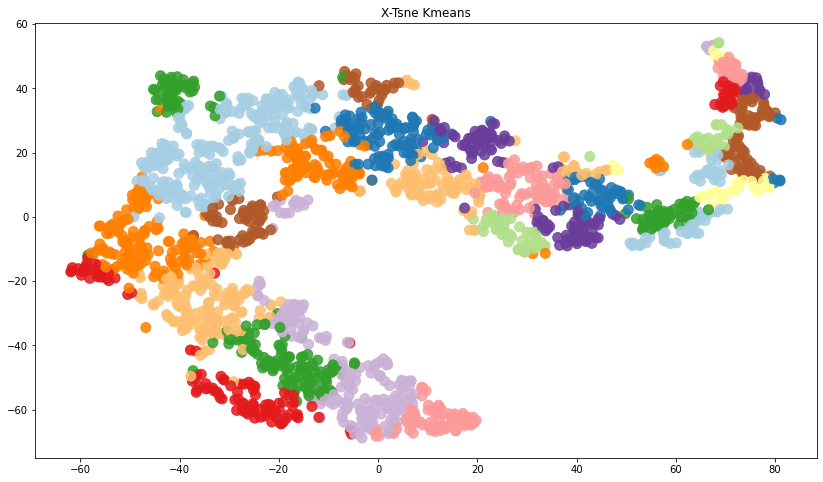

In [13]:
fig = plt.figure( figsize=(14,8))
ax = fig.add_subplot(1, 1, 1, title='X-Tsne Kmeans' )
# Create the scatter
ax.scatter(
    x=X_tsne_df['X_tsne_1'], 
    y=X_tsne_df['X_tsne_2'], 
    c=X_tsne_df['labels'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.85,
    s=100)

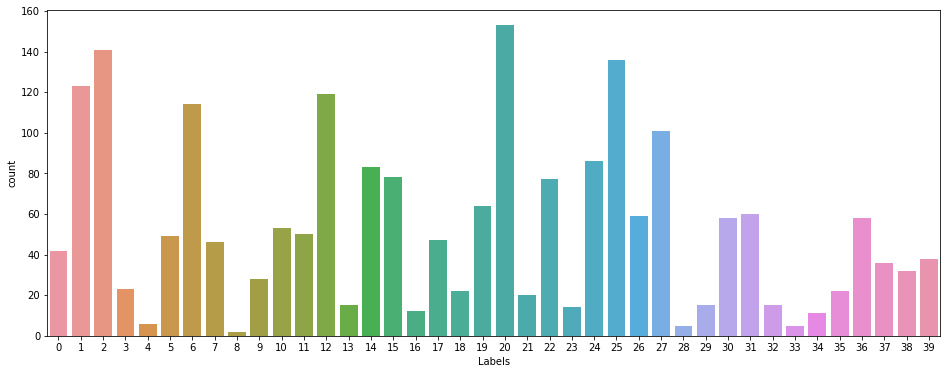

In [14]:
plt.figure(figsize= (16,6))
sns.countplot(x = clustered_series.index, data = clustered_series['Labels'])
plt.xlabel = 'Number of Clusters'
plt.ylabel = 'Number of Stocks in each CLuster'

In [15]:
tickers = clustered_series[clustered_series['Labels'] == 0].reset_index()['Ticker'].tolist()

In [16]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.001:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [17]:
dfObj = pd.DataFrame()
for stock in tickers:
    dfObj[stock] = yf.download(stock, '2018-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [18]:
scores, pvalues, pairs = find_cointegrated_pairs(dfObj)

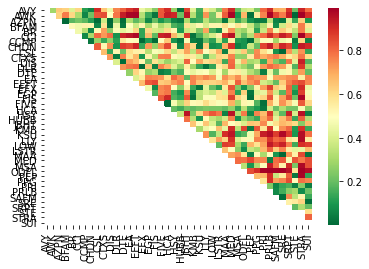

[('AWK', 'STE'), ('MAA', 'SRE')]


In [19]:
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=tickers, 
                yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.999)
                )
plt.show()
print(pairs)

In [23]:
dfObj

,AVY,AWK,AZPN,BFAM,BR,CCI,CCMP,CHDN,CSL,CTXS,...,PEP,PPG,PRI,PRLB,SAFM,SRE,SRPT,STE,STRA,SUI
2018-01-02,109.138992,84.360161,66.169998,94.029999,86.677498,98.969612,92.603134,78.517570,112.090309,86.466309,...,108.599167,111.963531,98.708809,103.849998,129.665985,96.436531,58.250000,85.578125,87.096642,85.555771
2018-01-03,109.450340,83.763557,66.169998,94.160004,86.601128,98.551682,92.881676,78.451607,113.153809,87.402237,...,108.314011,112.143822,97.789879,104.250000,129.695053,98.990486,58.549999,84.444313,86.504471,85.611763
2018-01-04,110.176788,82.968071,70.019997,94.589996,87.288452,97.406898,93.467590,78.039307,113.192139,88.425919,...,108.847534,111.460663,99.337494,105.349998,129.782196,98.331406,57.810001,83.911331,86.857857,84.492142
2018-01-05,111.478760,82.153633,70.779999,95.750000,88.357590,98.151932,94.159149,79.012321,113.000519,89.186356,...,109.160294,112.836487,100.256416,106.250000,129.559418,99.274254,54.869999,84.260193,87.258995,83.885712
2018-01-08,111.893875,82.863884,73.110001,95.050003,88.901703,98.442657,94.946777,79.177246,113.776596,88.689140,...,108.534775,112.646713,100.014587,107.349998,130.218094,99.301720,54.020000,86.062630,87.335411,85.079941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-25,150.930786,153.130005,134.990005,173.020004,146.270004,164.960007,151.440002,185.220001,149.080002,121.410004,...,144.160004,146.690002,134.740005,136.020004,137.649994,131.960007,135.720001,189.289993,90.790001,140.119995
2020-11-27,149.676025,153.729996,134.550003,171.279999,147.399994,167.169998,152.470001,185.000000,148.619995,122.440002,...,144.600006,147.779999,134.509995,138.729996,137.570007,130.460007,139.149994,191.690002,93.180000,138.610001
2020-11-30,148.720001,153.380005,134.449997,170.110001,146.880005,167.570007,154.279999,179.919998,144.830002,123.919998,...,144.229996,146.770004,130.270004,138.160004,136.729996,127.480003,140.860001,193.809998,93.889999,139.000000
2020-12-01,151.750000,154.300003,133.820007,169.020004,148.449997,170.800003,151.919998,182.880005,147.820007,125.589996,...,146.070007,149.110001,133.410004,136.339996,140.270004,127.760002,145.940002,193.929993,94.250000,143.300003


0.000334493642811945


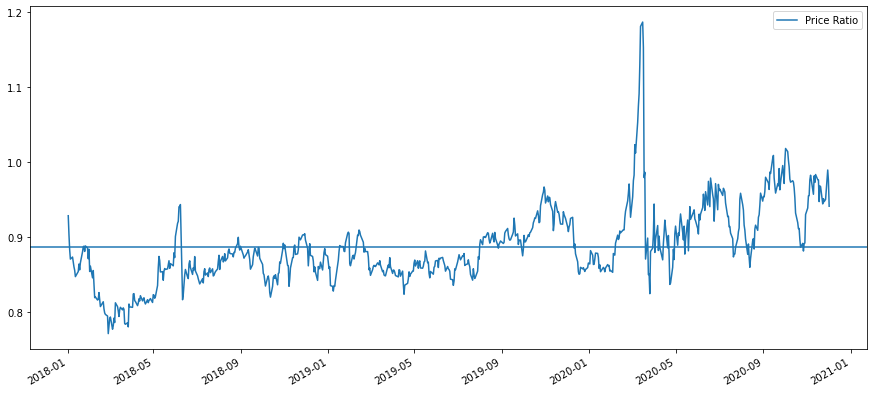

In [40]:
S1 = dfObj['MAA']
S2 = dfObj['SRE']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean())
plt.legend(['Price Ratio'])
plt.show()

In [41]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

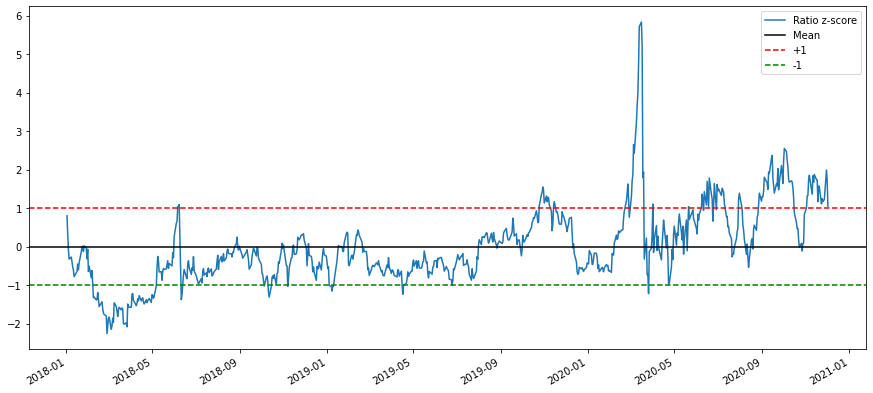

In [42]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

In [43]:
ratios = S1 / S2
print(len(ratios))
train = ratios[:470] #CHANGE
test = ratios[470:]

736


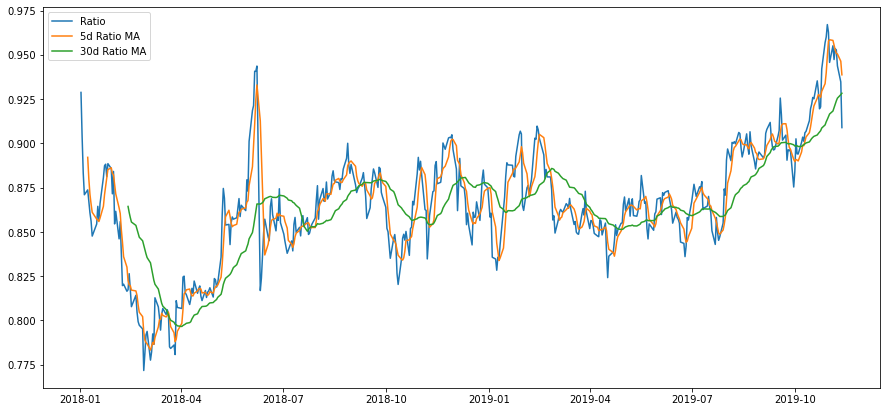

In [44]:
ratios_mavg5 = train.rolling(window=5,
                               center=False).mean()

ratios_mavg30 = train.rolling(window=30,
                               center=False).mean()

std_30 = train.rolling(window=30,
                        center=False).std()

zscore_30_5 = (ratios_mavg5 - ratios_mavg30)/std_30
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg30.index, ratios_mavg30.values)

plt.legend(['Ratio','5d Ratio MA', '30d Ratio MA'])
#plt.ylabel('Ratio')
plt.show()

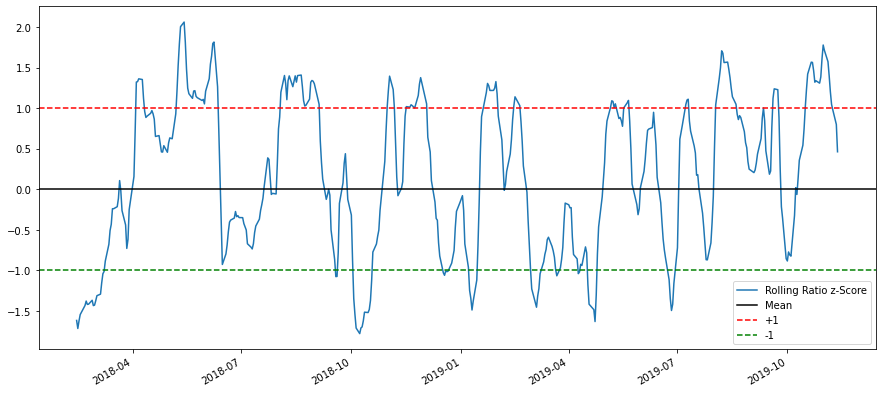

In [45]:
std_30 = train.rolling(window=30,center=False).std()
std_30.name = 'std 30d'

# Compute the z score for each day
zscore_30_5 = (ratios_mavg5 - ratios_mavg30)/std_30
zscore_30_5.name = 'z-score'

plt.figure(figsize=(15,7))
zscore_30_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

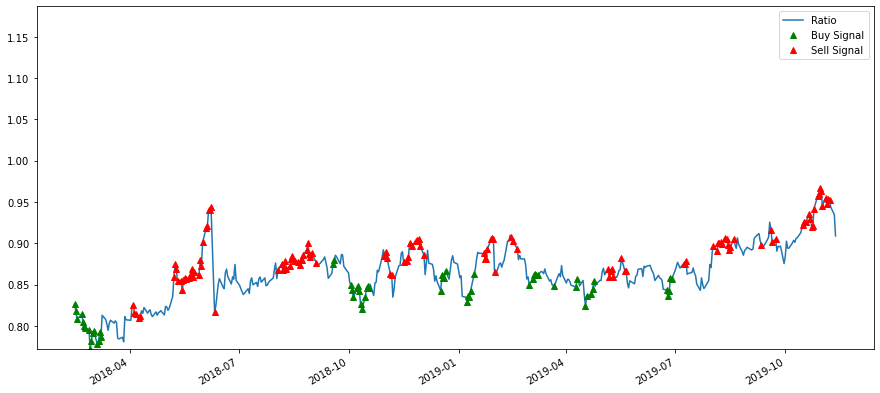

In [46]:
plt.figure(figsize=(15,7))

train[30:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_30_5>-1] = 0
sell[zscore_30_5<1] = 0
buy[30:].plot(color='g', linestyle='None', marker='^')
sell[30:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [50]:
def trade(S1, S2, window1, window2):
   # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] + S2[i] * countS2
            countS1 = 0
            countS2 = 0
#         print('Z-score: '+ str(zscore[i]), countS1, countS2, S1[i] , S2[i])
    return money
vals = []

trade(dfObj['MAA'].iloc[:470], dfObj['SRE'].iloc[:470], 5, 30)

363.88315502187095

In [51]:
length_scores = [trade(S1.iloc[:470], 
                S2.iloc[:470], 5, l) 
                for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 30


In [52]:
length_scores2 = [trade(S1.iloc[470:], 
                  S2.iloc[470:],5, l) 
                  for l in range(255)]
print (best_length, 'day window:', length_scores2[best_length])

# Find the best window length based on this dataset, 
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

30 day window: 443.6241816283383
60 day window: 756.4283595437145


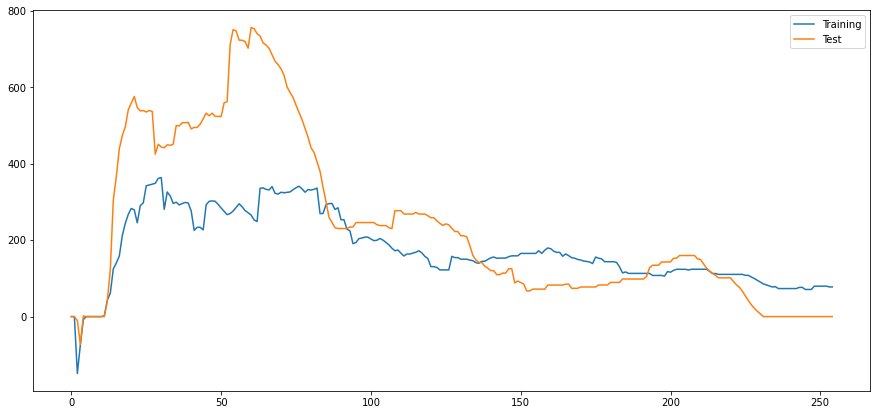

In [53]:
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
#plt.xlabel('Window length')
#plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()